In [1]:
import os
import pandas as pd

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/'

#### Extracting Visualization Plots - Action Count and Time Spent by Completed Step

Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C001A_ActionSteps.ipynb


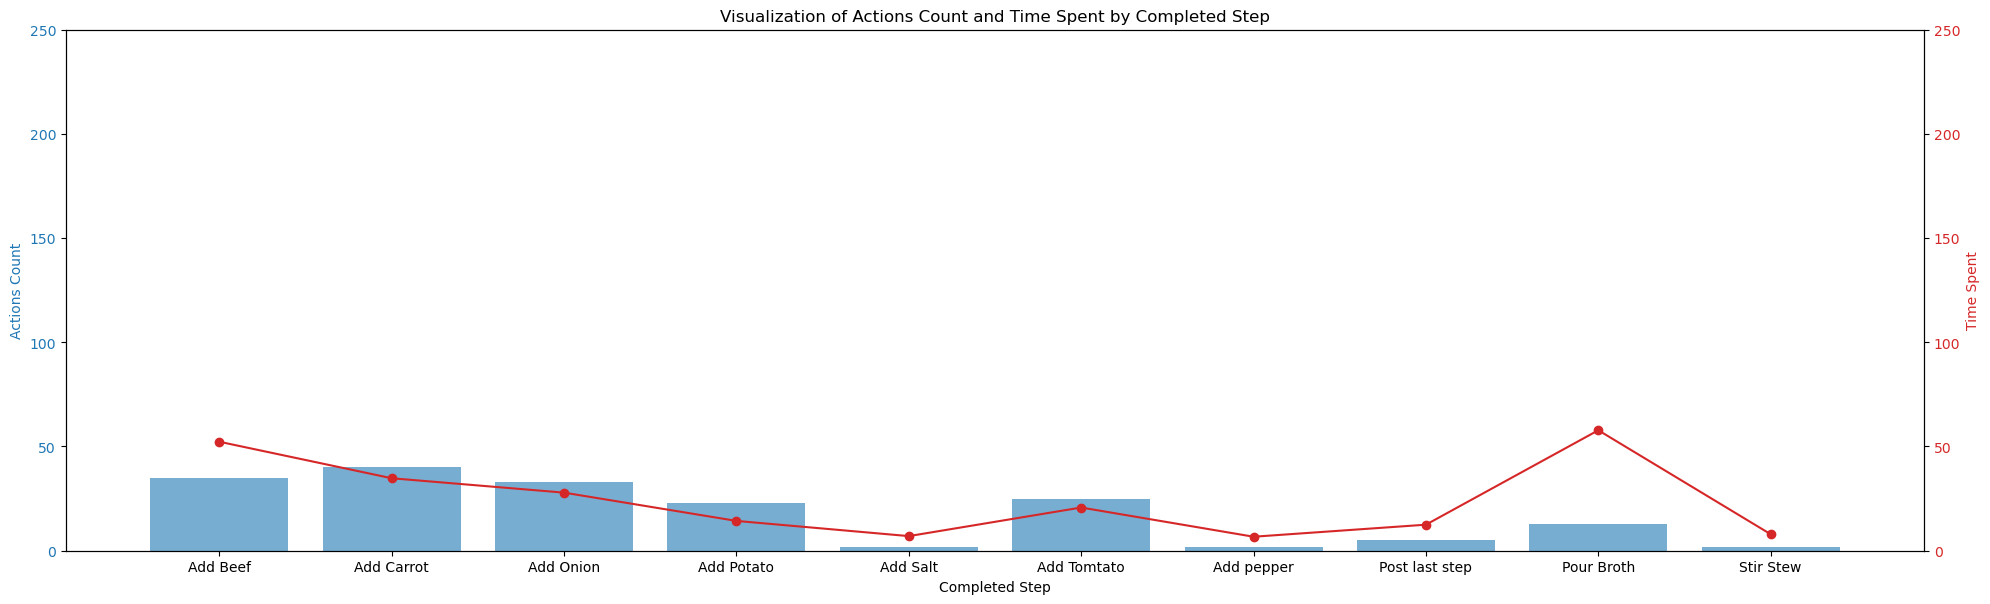

Extracted df_grouped from C001A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C003A_ActionSteps.ipynb


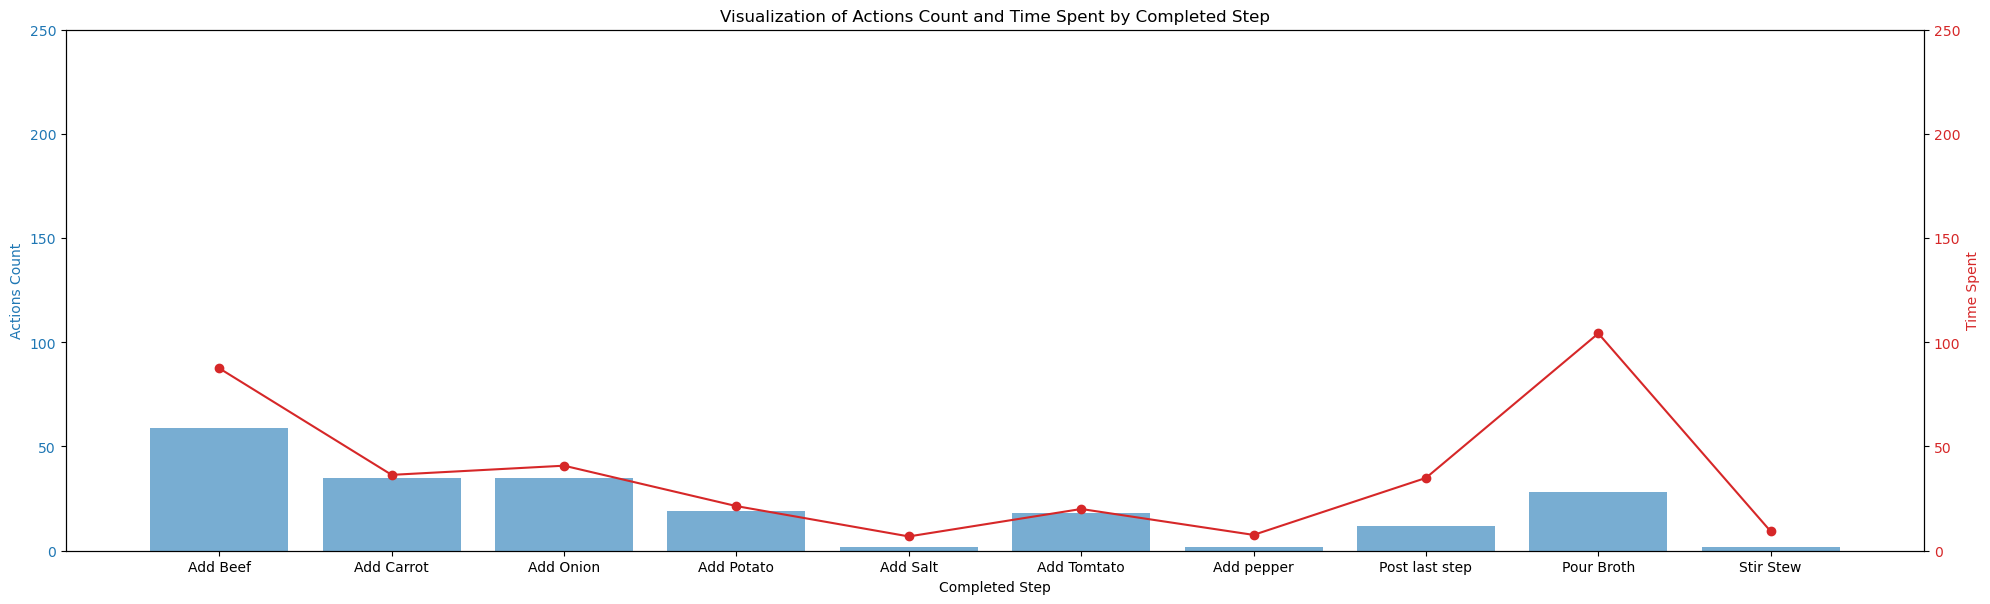

Extracted df_grouped from C003A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C006D_ActionSteps.ipynb


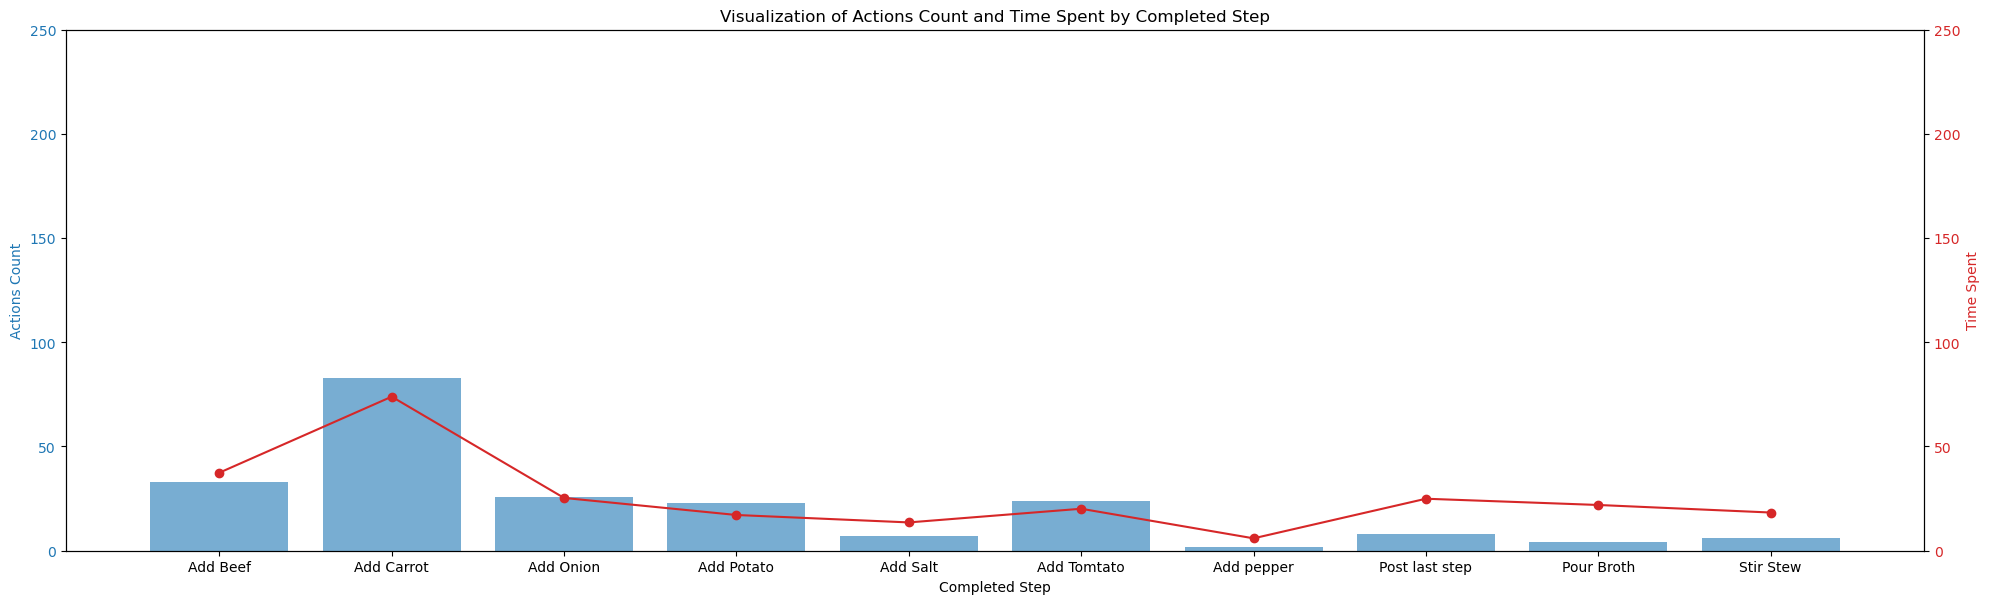

Extracted df_grouped from C006D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C008D_ActionSteps.ipynb


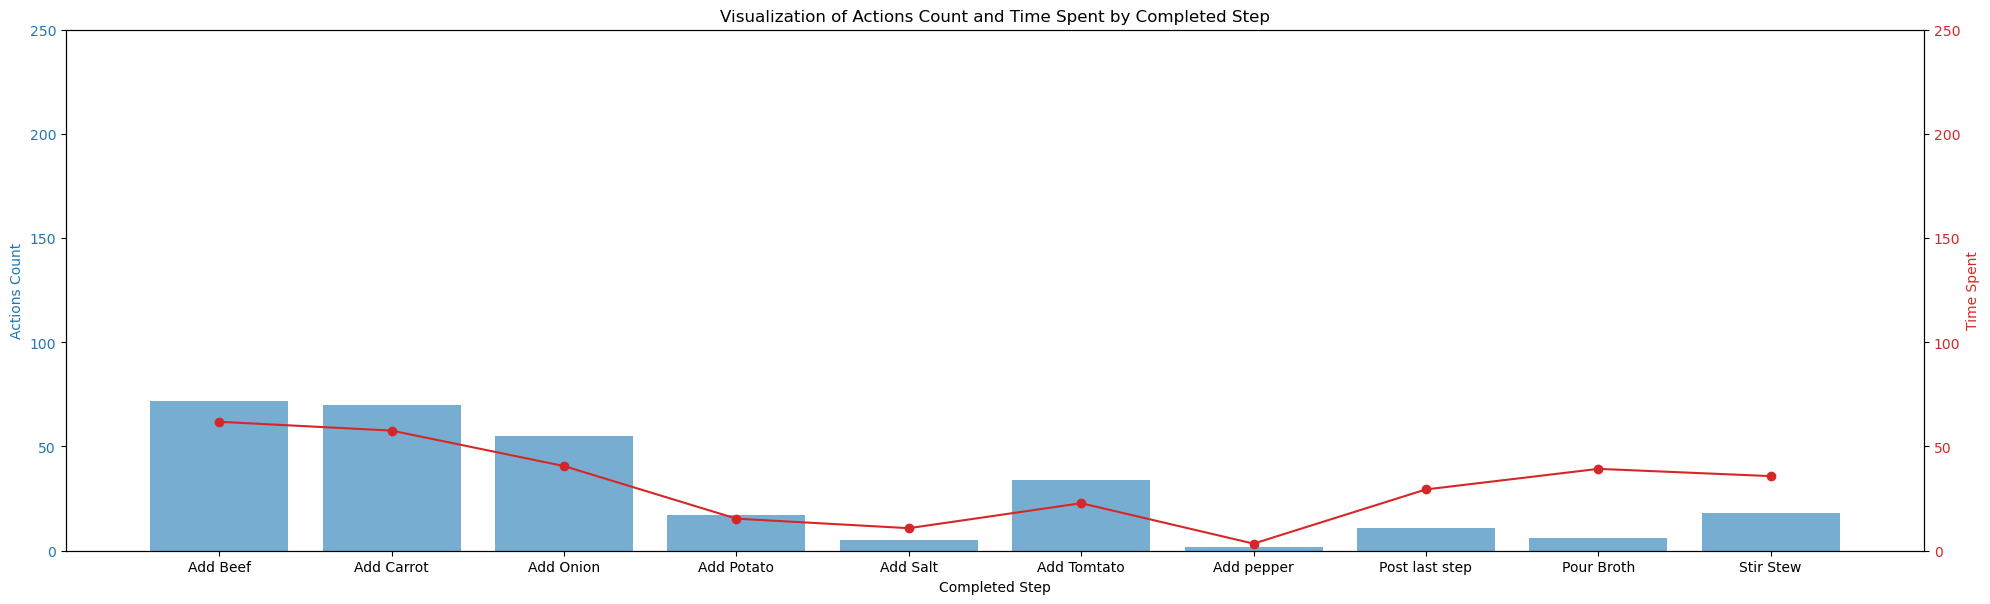

Extracted df_grouped from C008D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C009A_ActionSteps.ipynb


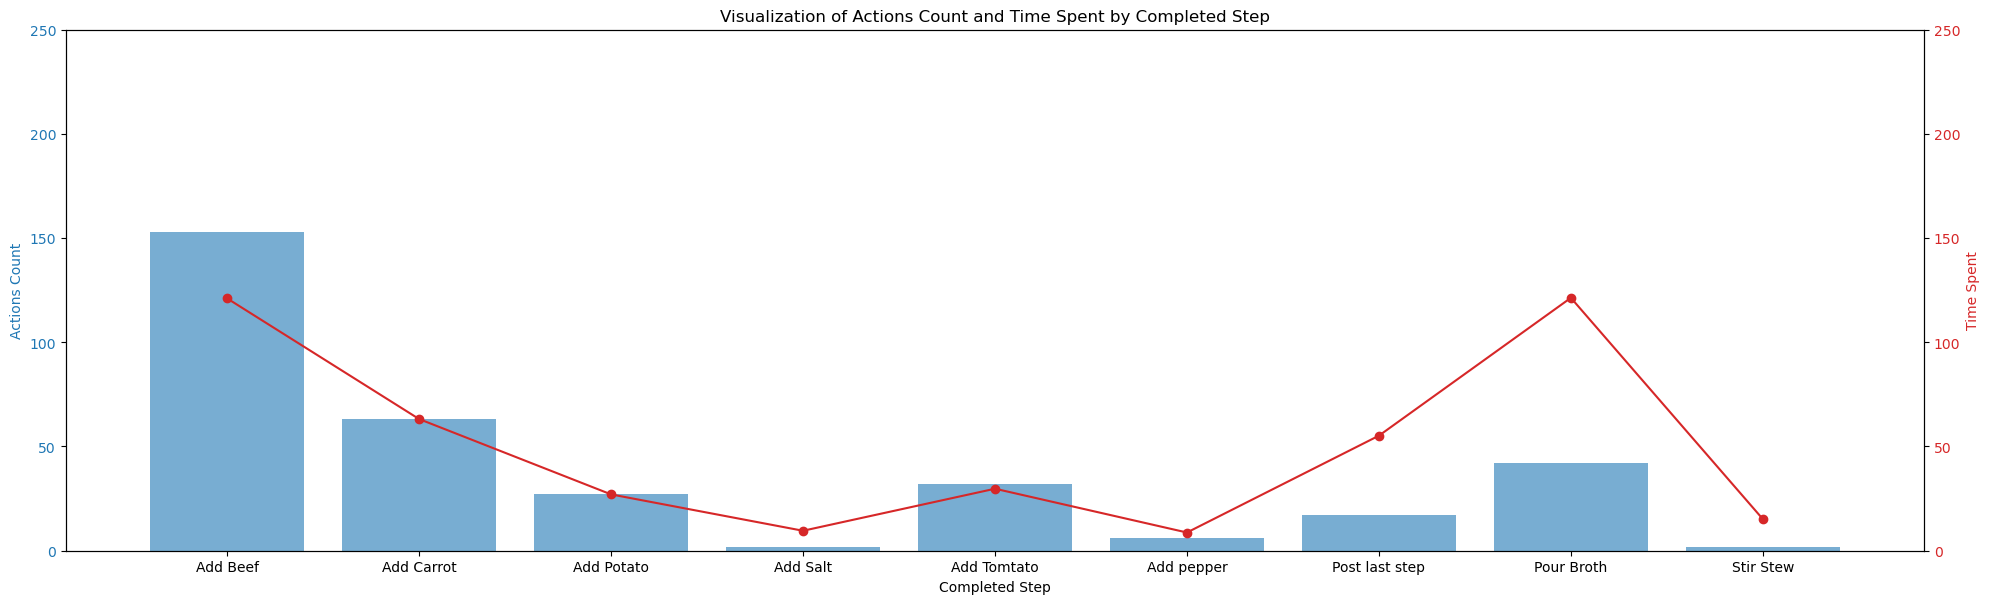

Extracted df_grouped from C009A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C012D_ActionSteps.ipynb


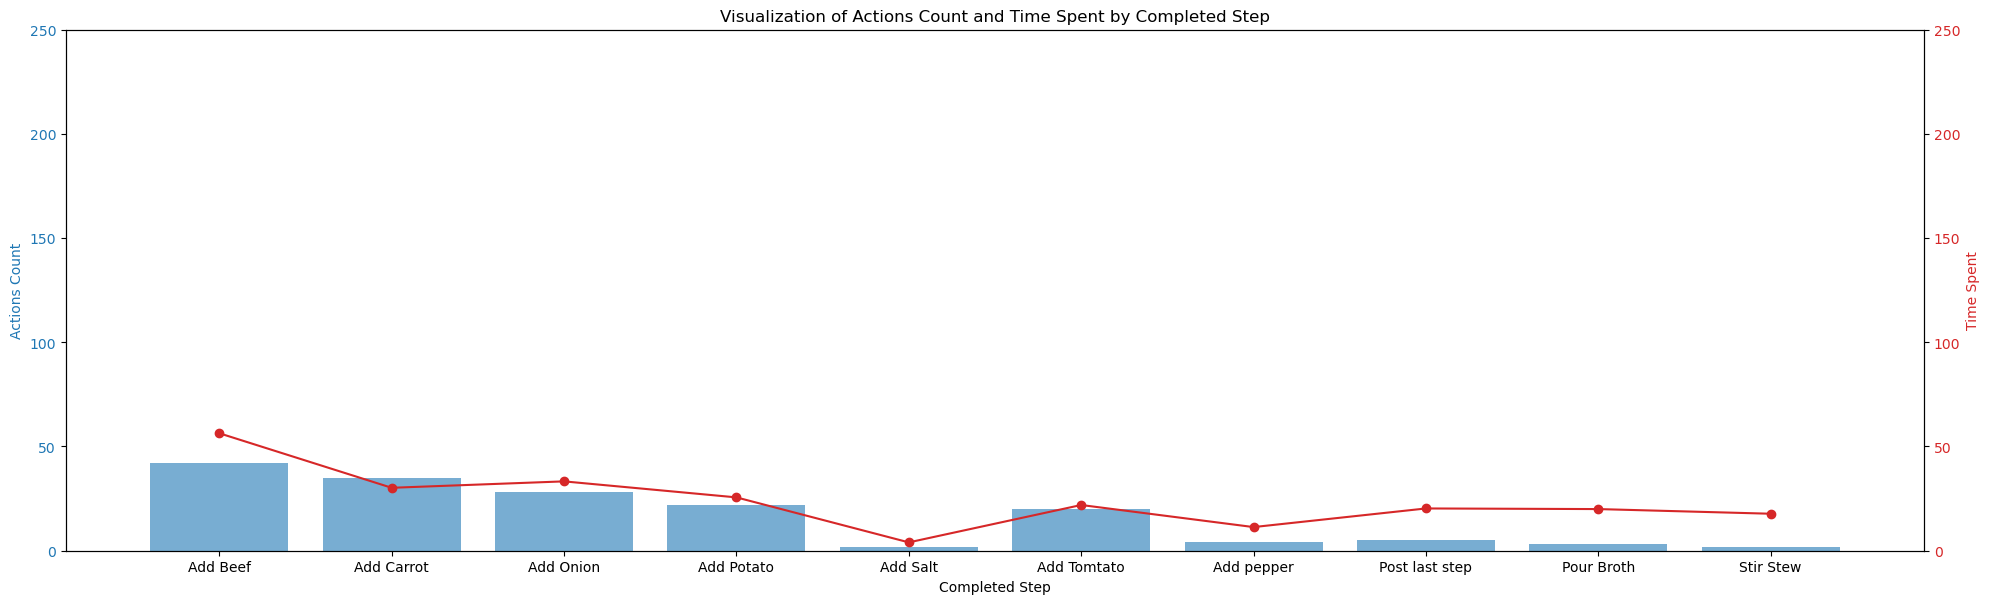

Extracted df_grouped from C012D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C013A_ActionSteps.ipynb


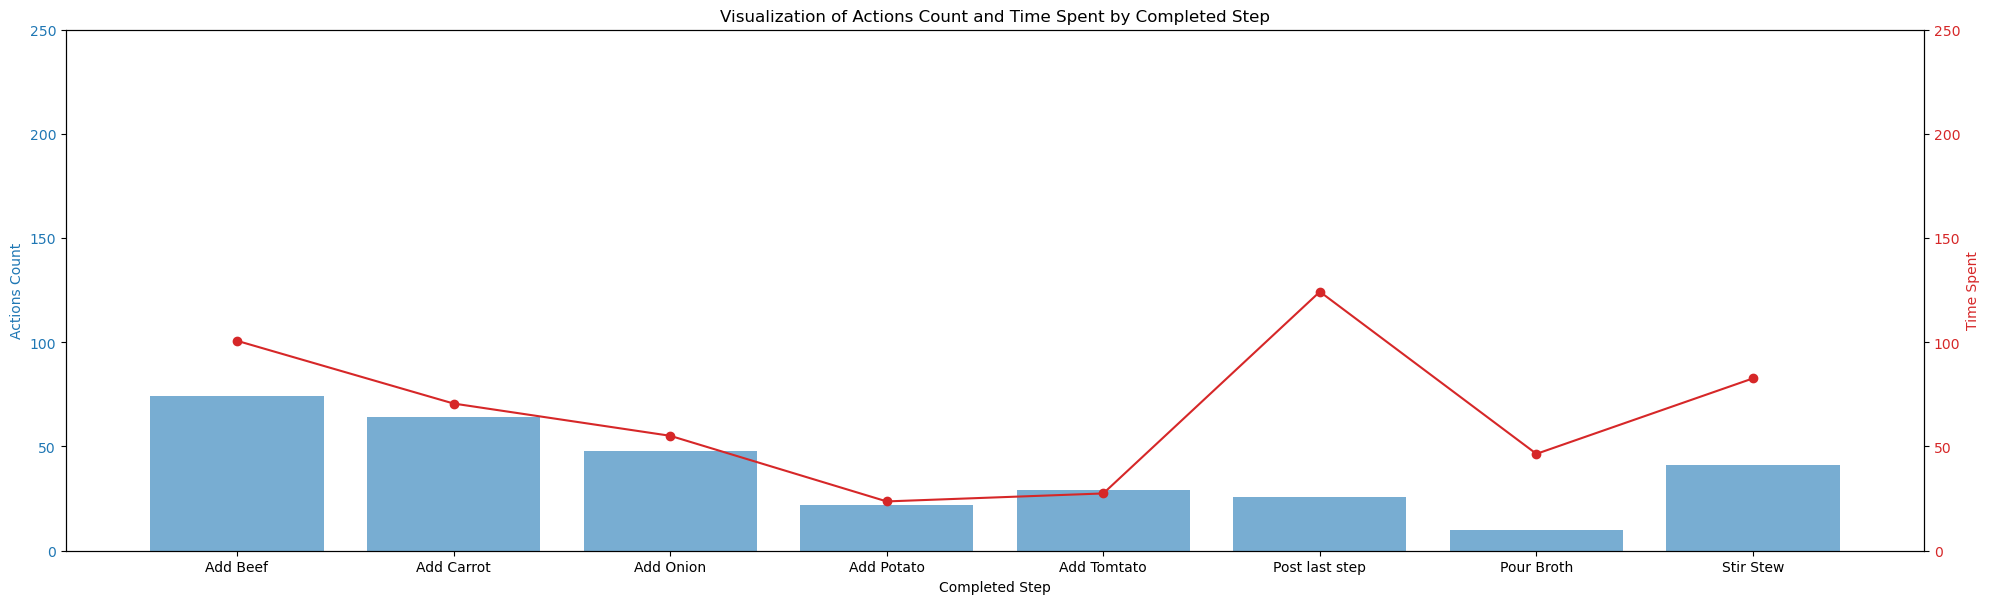

Extracted df_grouped from C013A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C016D_ActionSteps.ipynb


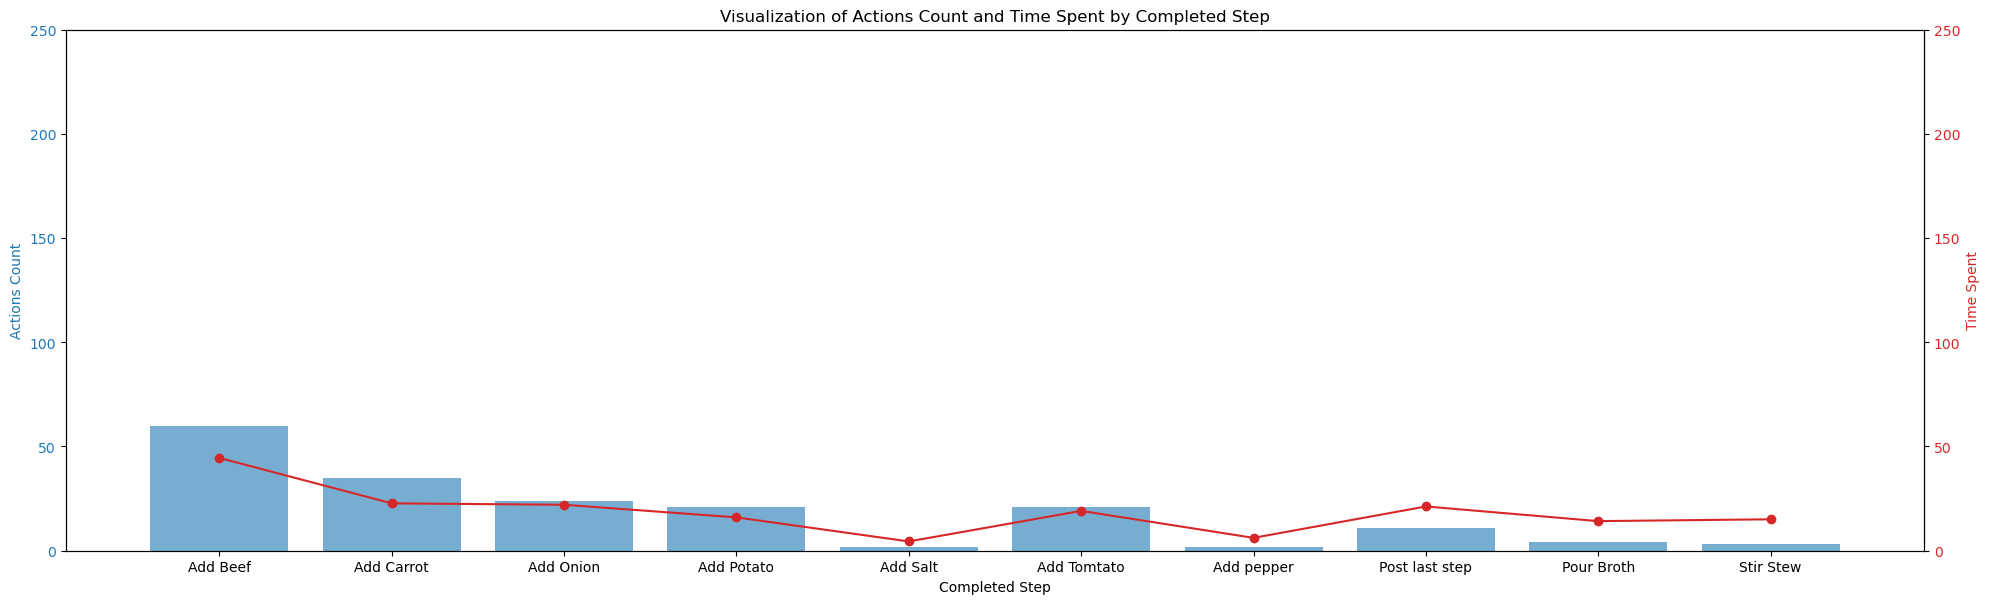

Extracted df_grouped from C016D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C017A_ActionSteps.ipynb


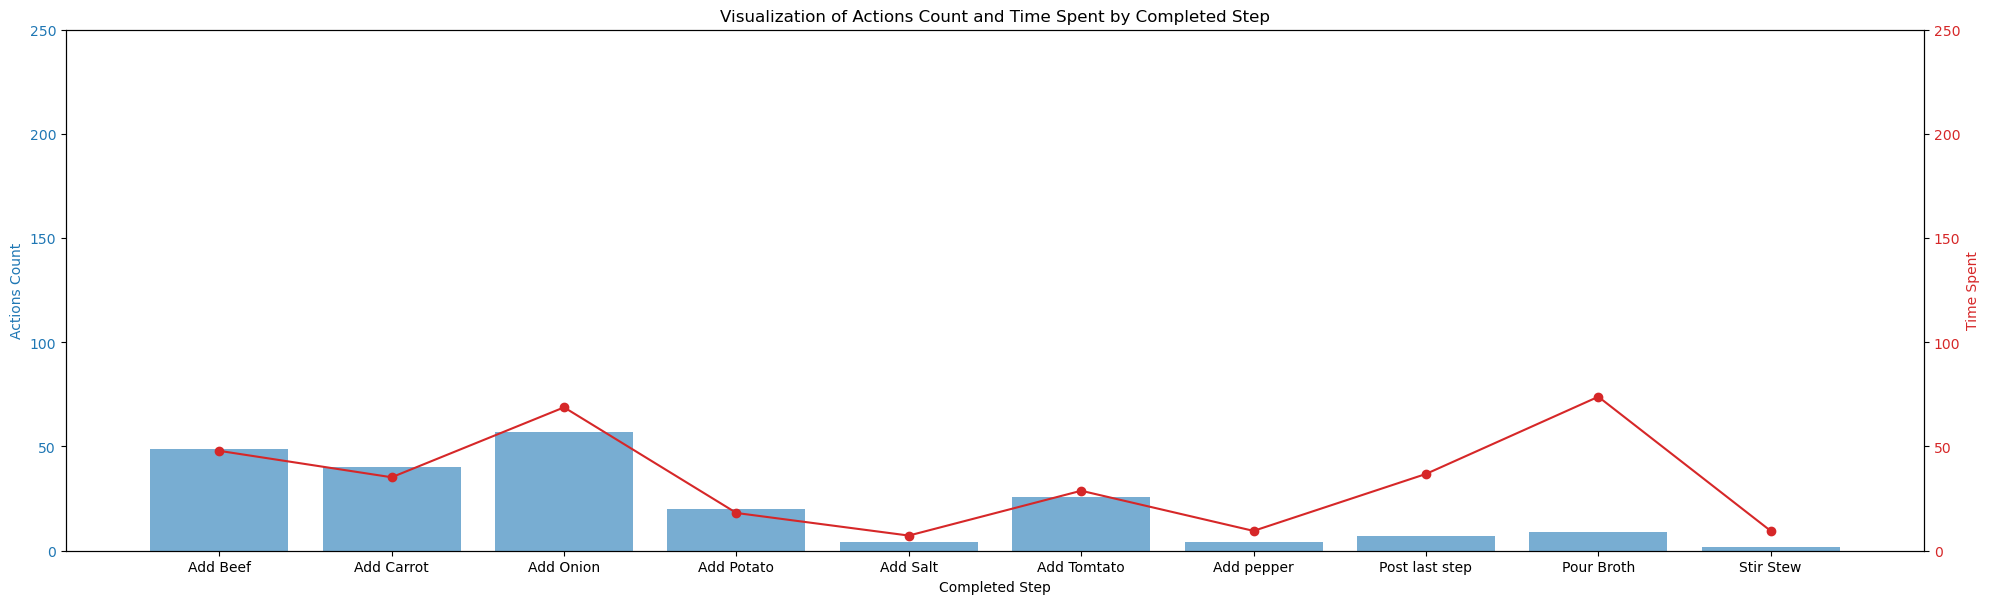

Extracted df_grouped from C017A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C020D_ActionSteps.ipynb


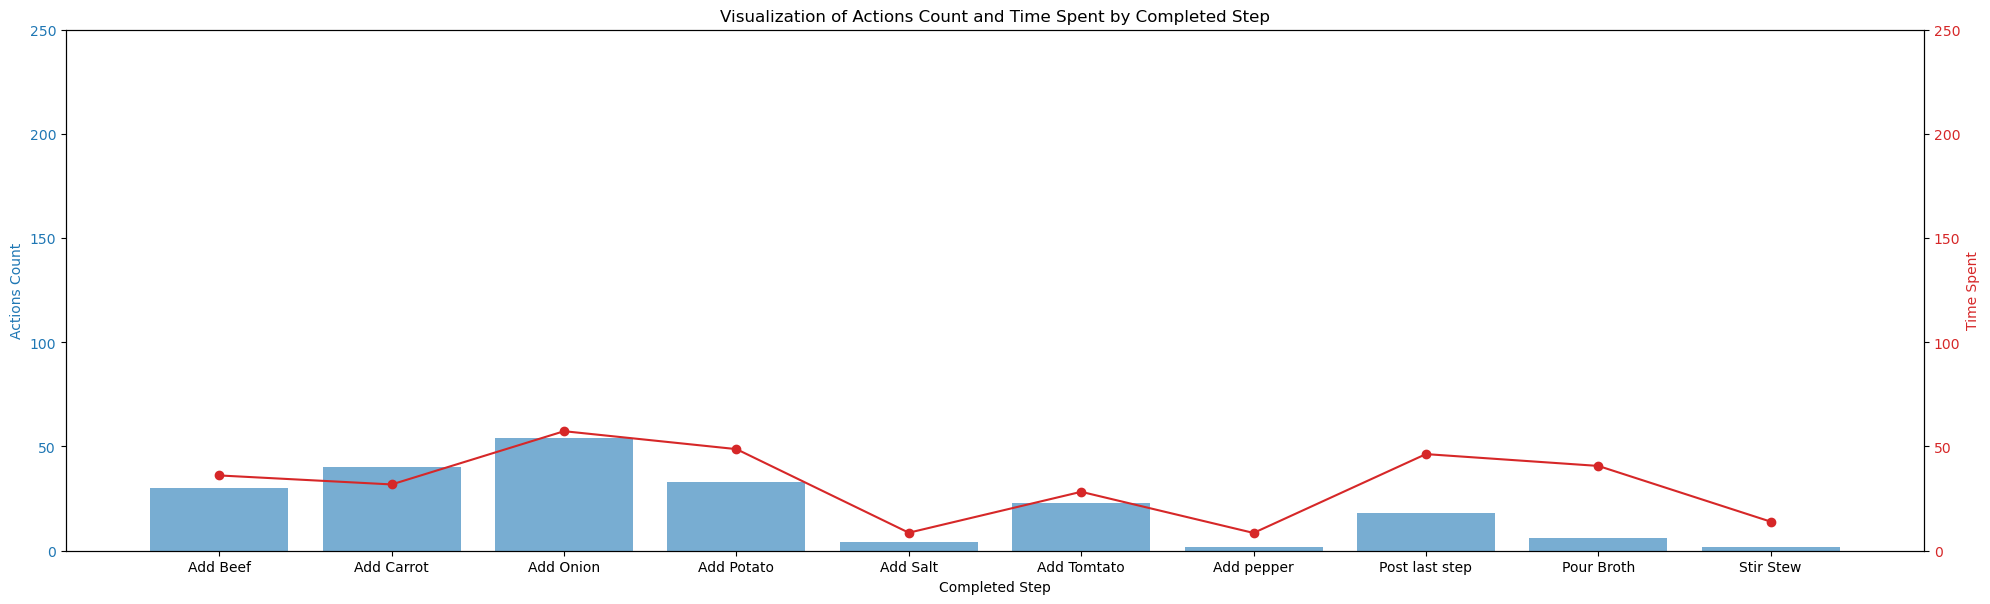

Extracted df_grouped from C020D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C021A_ActionSteps.ipynb


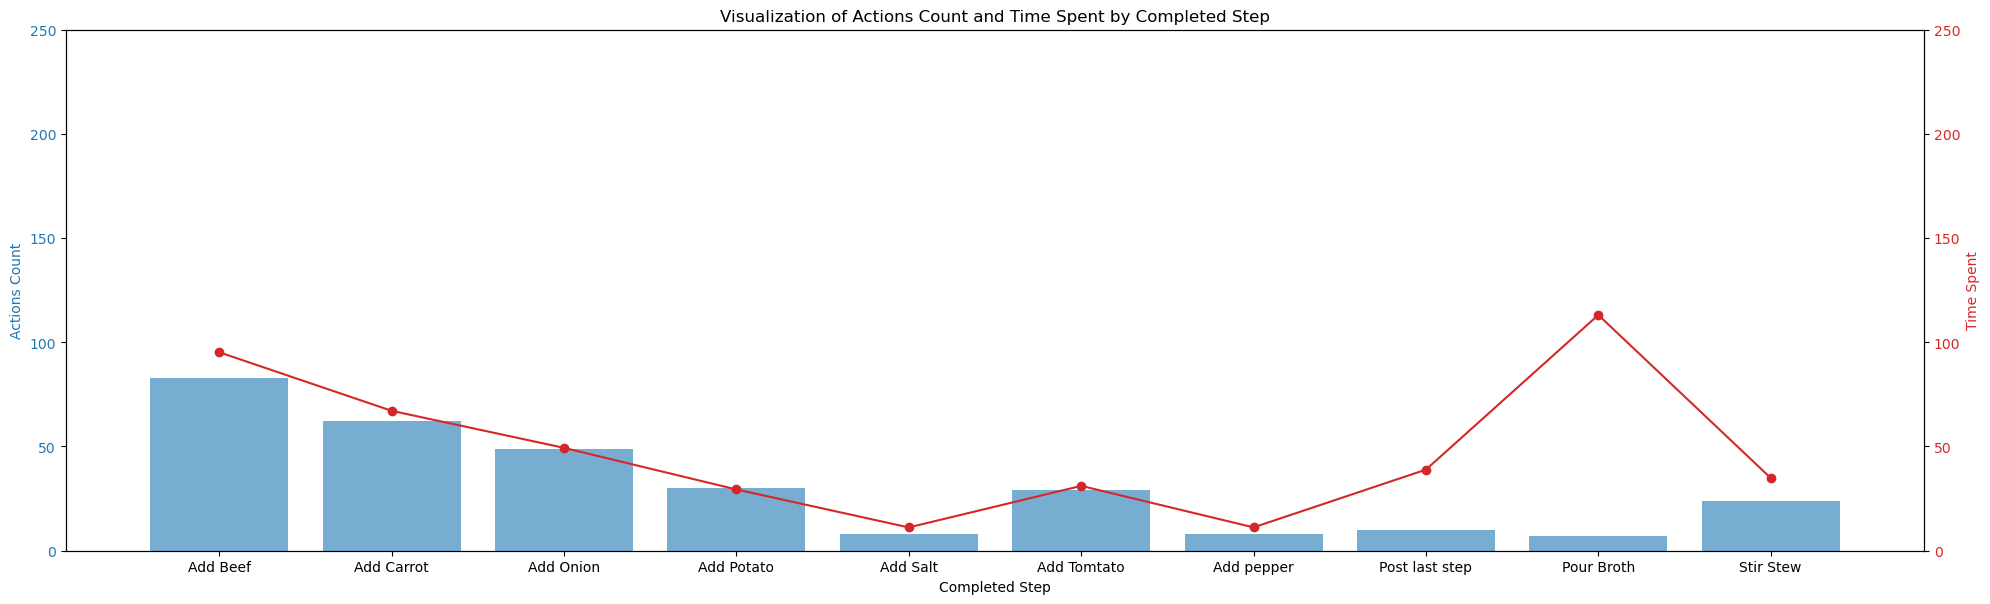

Extracted df_grouped from C021A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C024D_ActionSteps.ipynb


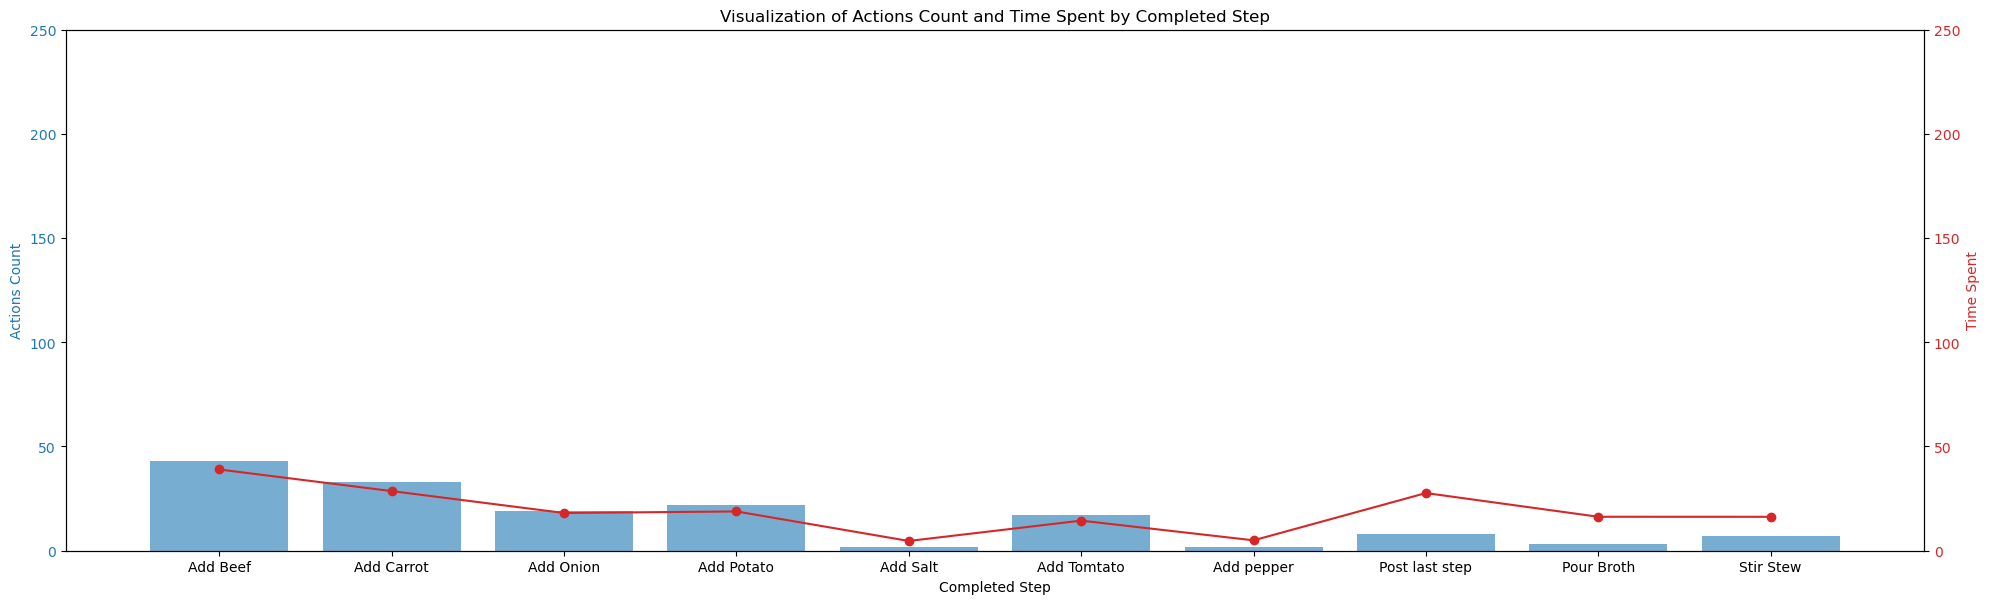

Extracted df_grouped from C024D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C025A_ActionSteps.ipynb


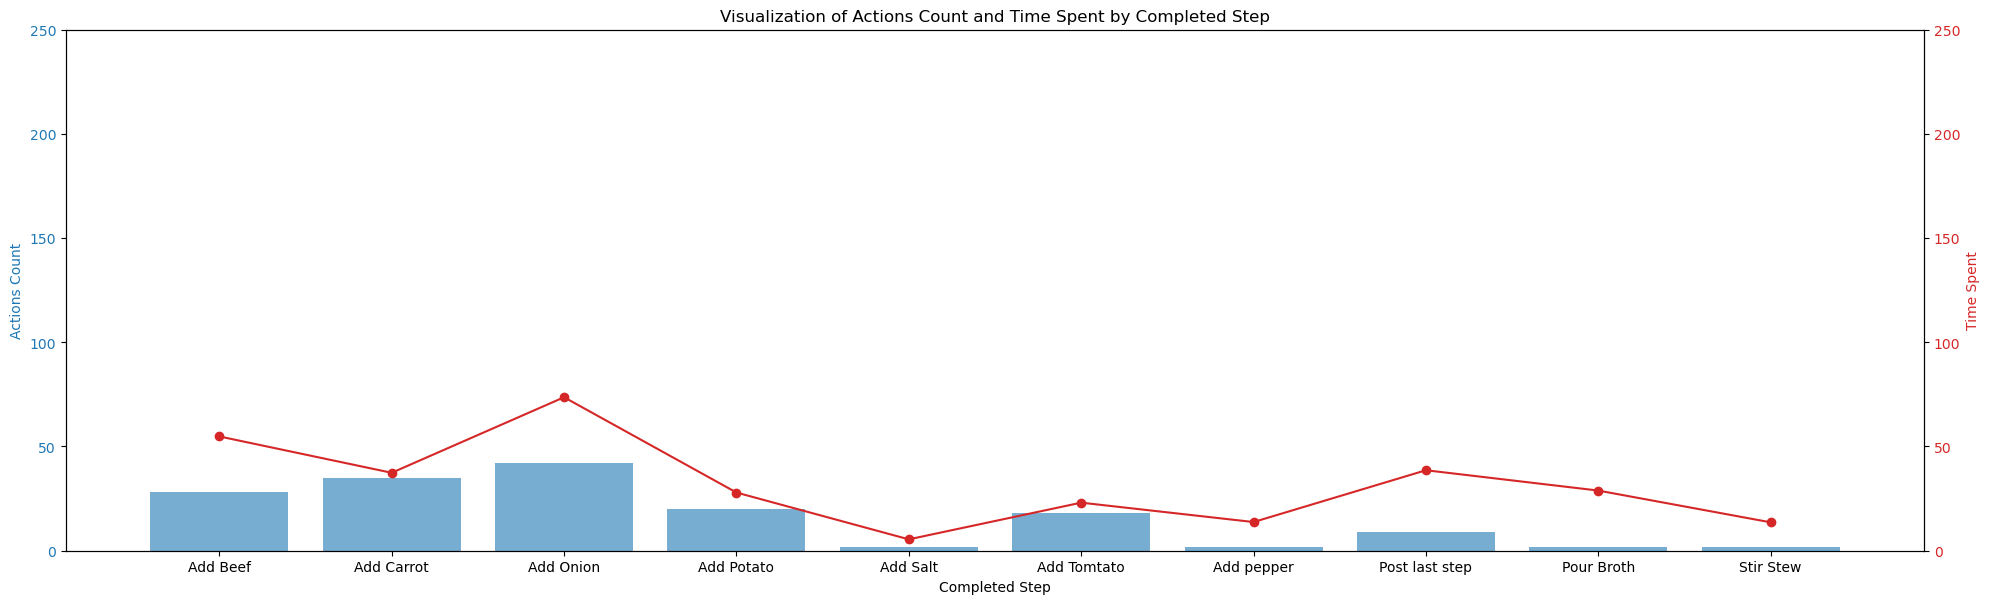

Extracted df_grouped from C025A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C028D_ActionSteps.ipynb


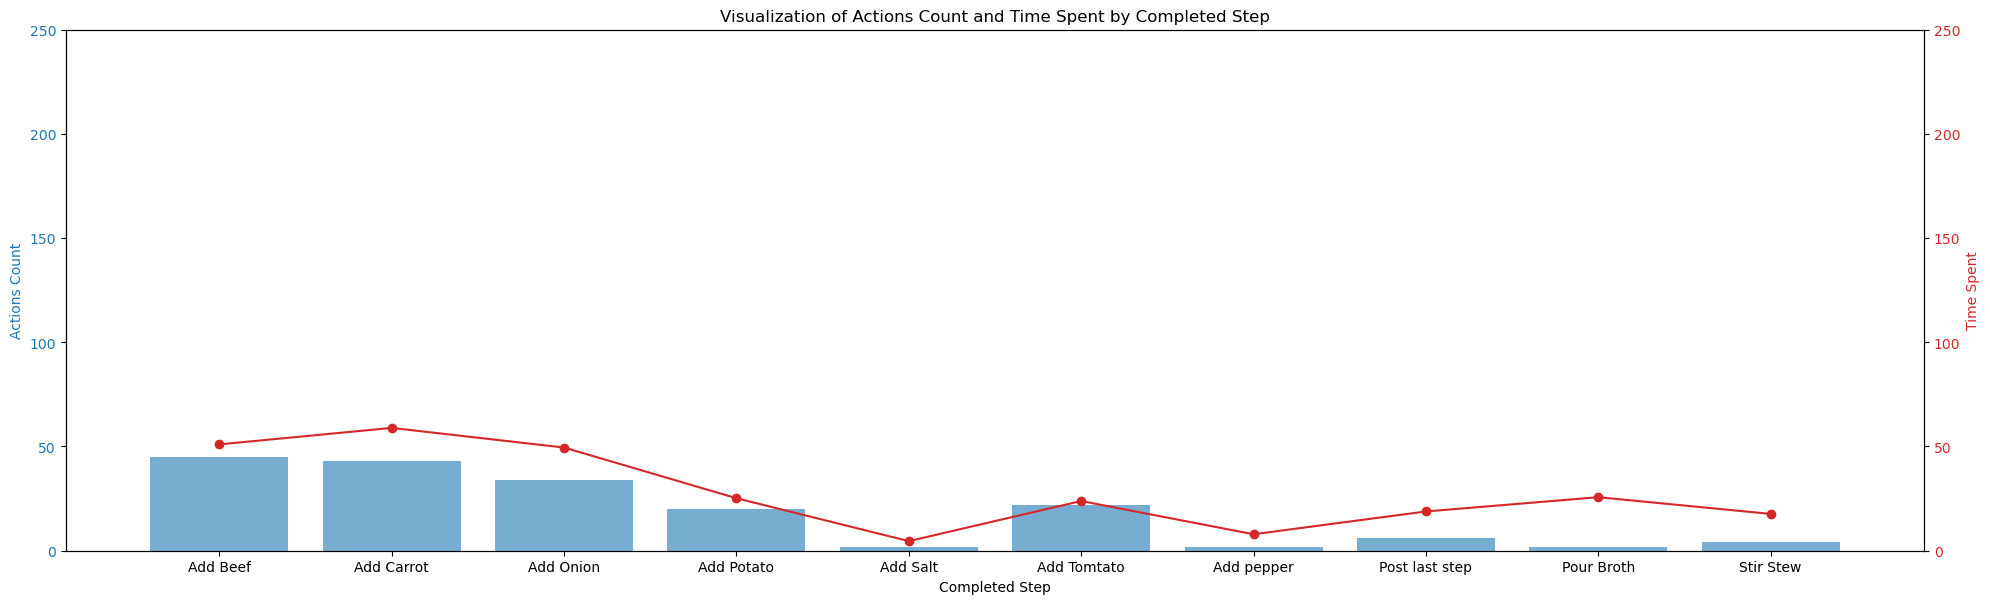

Extracted df_grouped from C028D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C029A_ActionSteps.ipynb


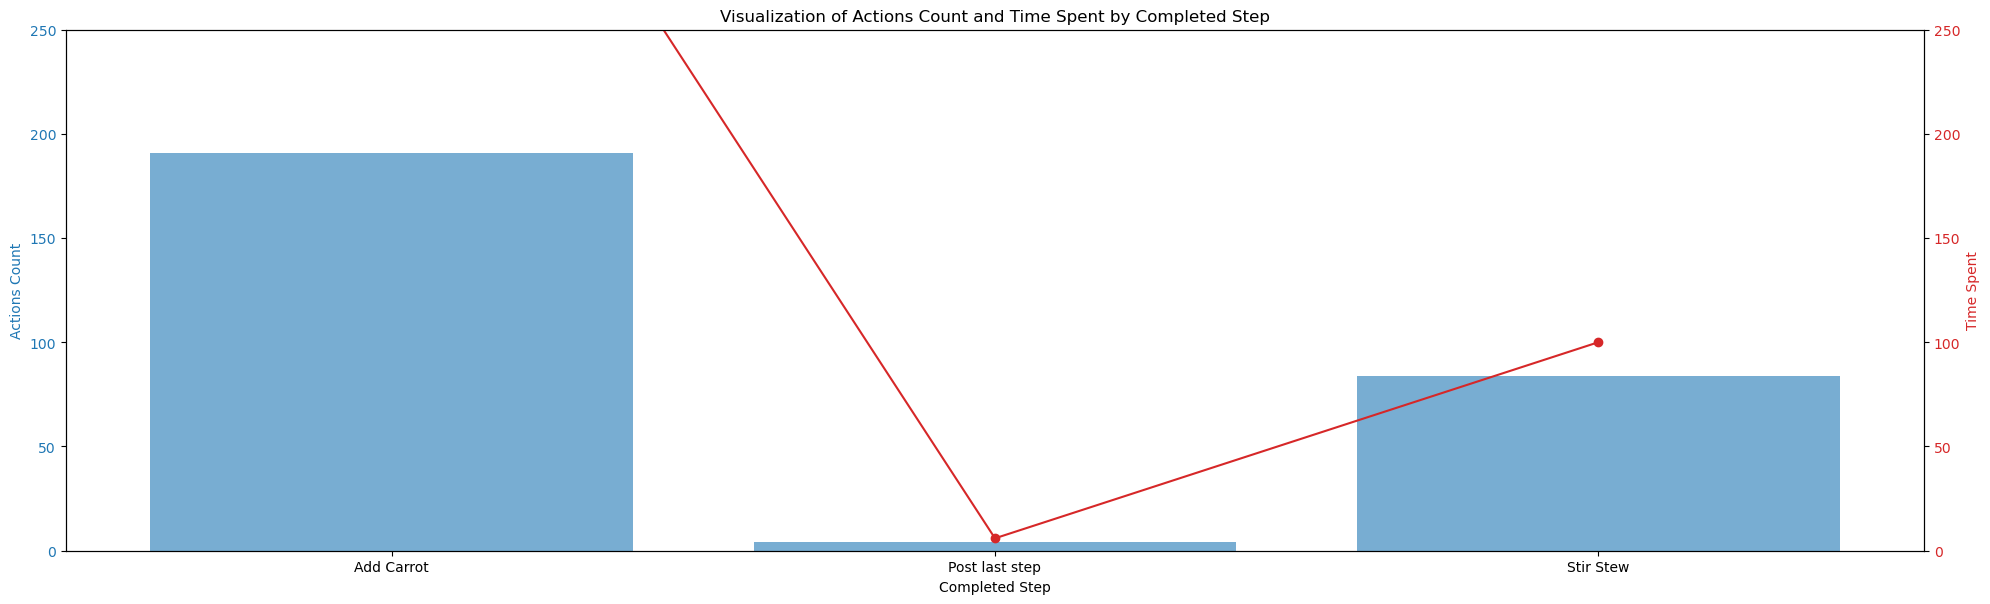

Extracted df_grouped from C029A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C032D_ActionSteps.ipynb


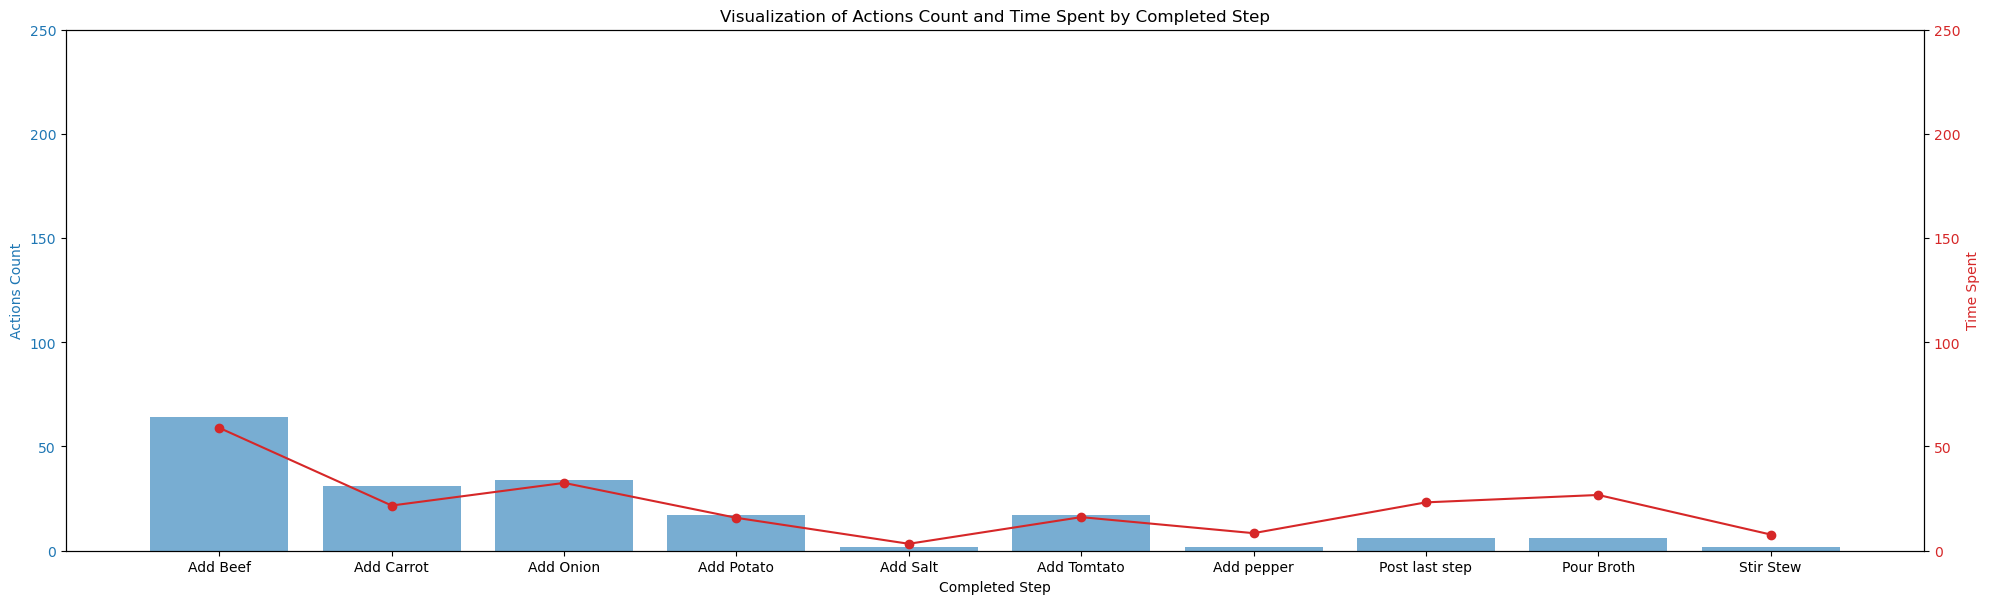

Extracted df_grouped from C032D_ActionSteps.ipynb


In [3]:
import nbformat

# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    df = None
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    df = exec_env.get('df_grouped')
    return df

# Process each notebook file
for filename in os.listdir(directory):
    if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        df = extract_totals_df(nb)
        
        if df is not None:
            print(f"Extracted df_grouped from {filename}")
            dfs.append(df)
        else:
            print(f"No df_grouped found in {filename}")

combined_df = pd.concat(dfs)


#### Extracting Action Counts for Participants according to every completed step

In [4]:
import nbformat
import glob
import matplotlib.pyplot as plt

In [5]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'result_df' in local_context:
                    return local_context['result_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/'
file_pattern = directory + '*_ActionSteps.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Aggregate the data
aggregated_data = combined_df.groupby(['Participant', 'Completed Step']).agg({'Actions Count': 'sum'}).reset_index()

aggregated_data



,Participant,Completed Step,Actions Count
0,C001,Add Beef,35
1,C001,Add Carrot,40
2,C001,Add Onion,33
3,C001,Add Potato,23
4,C001,Add Salt,2
...,...,...,...
145,C032,Add Tomtato,17
146,C032,Add pepper,2
147,C032,Post last step,6
148,C032,Pour Broth,6


In [6]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
pivot_table

Participant,C001,C003,C006,C008,C009,C012,C013,C016,C017,C020,C021,C024,C025,C028,C029,C032
Completed Step,,,,,,,,,,,,,,,,
Add Beef,35,59,33,72,153,42,74,60,49,30,83,43,28,45,0,64
Add Carrot,40,35,83,70,63,35,64,35,40,40,62,33,35,43,191,31
Add Onion,33,35,26,55,0,28,48,24,57,54,49,19,42,34,0,34
Add Potato,23,19,23,17,27,22,22,21,20,33,30,22,20,20,0,17
Add Salt,2,2,7,5,2,2,0,2,4,4,8,2,2,2,0,2
Add Tomtato,25,18,24,34,32,20,29,21,26,23,29,17,18,22,0,17
Add pepper,2,2,2,2,6,4,0,2,4,2,8,2,2,2,0,2
Post last step,5,12,8,11,17,5,26,11,7,18,10,8,9,6,4,6
Pour Broth,13,28,4,6,42,3,10,4,9,6,7,3,2,2,0,6


In [7]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
pivot_table = pivot_table.transpose()
pivot_table['Action Count S.D'] = pivot_table.std(axis=1)
pivot_table

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Post last step,Pour Broth,Stir Stew,Action Count S.D
Participant,,,,,,,,,,,
C001,35,40,33,23,2,25,2,5,13,2,15.033296
C003,59,35,35,19,2,18,2,12,28,2,18.443909
C006,33,83,26,23,7,24,2,8,4,6,24.180800
C008,72,70,55,17,5,34,2,11,6,18,27.190685
C009,153,63,0,27,2,32,6,17,42,2,46.421259
C012,42,35,28,22,2,20,4,5,3,2,15.122096
C013,74,64,48,22,0,29,0,26,10,41,25.382409
C016,60,35,24,21,2,21,2,11,4,3,18.523559
C017,49,40,57,20,4,26,4,7,9,2,20.384090


In [8]:
pivot_table.to_csv('ActionCountVariability_SimpleStew.csv')

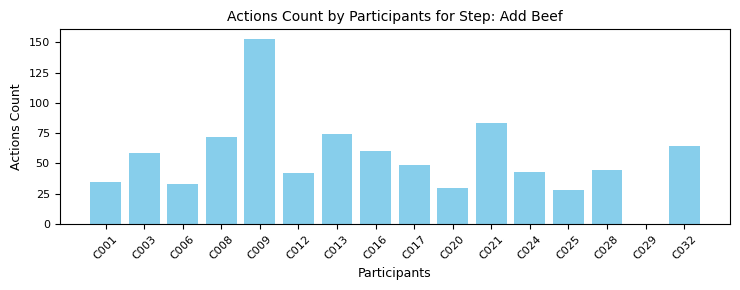

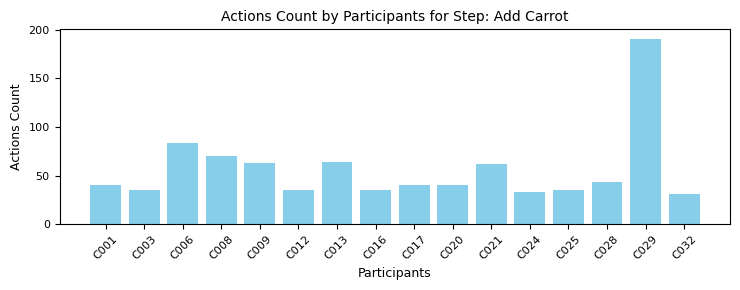

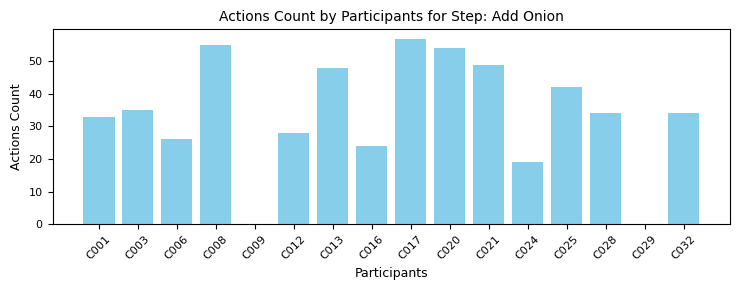

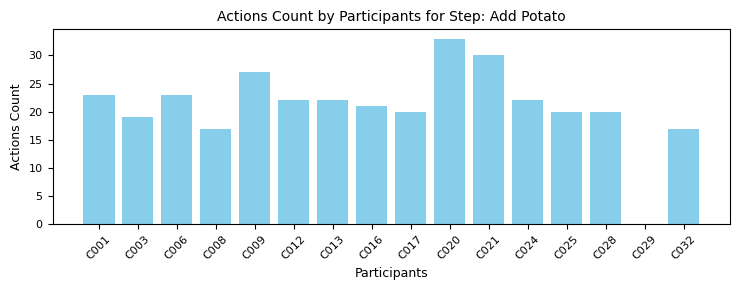

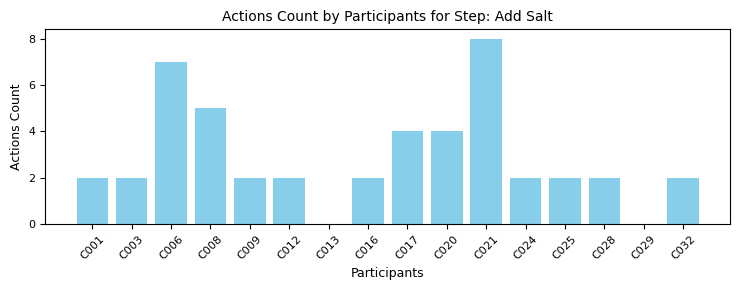

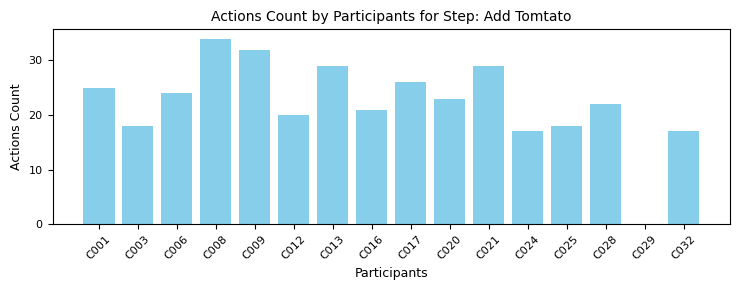

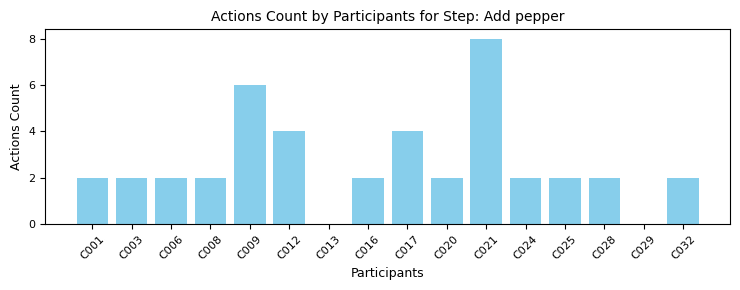

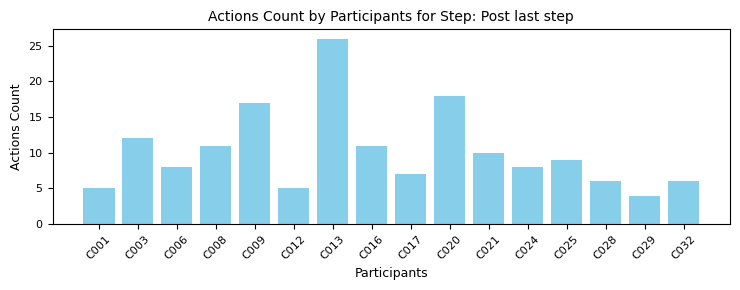

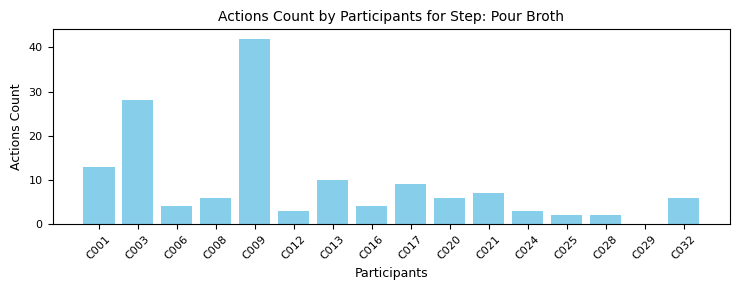

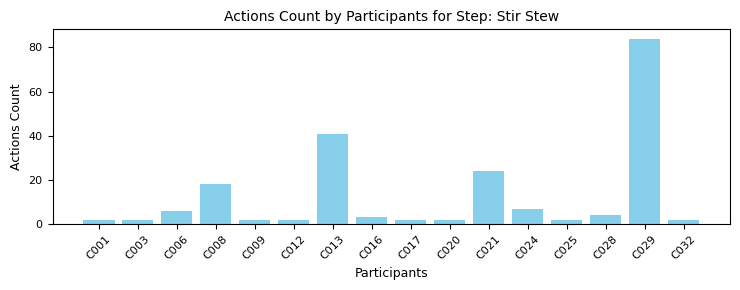

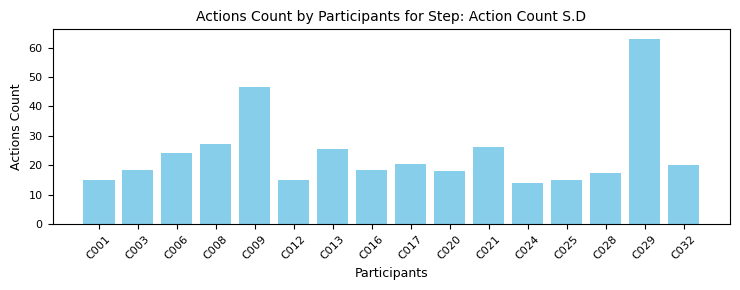

In [9]:
# Define the number of steps
steps = pivot_table.columns

for step in steps:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table.index, pivot_table[step], color='skyblue')
    plt.xlabel('Participants',fontsize=9)
    plt.ylabel('Actions Count',fontsize=9)
    plt.title(f'Actions Count by Participants for Step: {step}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

#### Extracting Action Counts for every participant according to "Action Type"

In [10]:
def extract_features_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'features_summary' in local_context:
                    return local_context['features_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

features_summaries = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_features_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id 
        features_summaries.append(df)
    else:
        print(f"No features_summary found in {file_path}")

combined_features_summary = pd.concat(features_summaries, ignore_index=True)
combined_features_summary

,Action Type,Action Count,Total Missed Interactions,Participant
0,Right Hand Grab,69,2.0,C001
1,Right Hand Released,58,0.0,C001
2,Chopped,19,0.0,C001
3,Left Hand Grab,18,1.0,C001
4,Left Hand Released,16,0.0,C001
...,...,...,...,...
69,Left Hand Grab,18,8.0,C029
70,Left Hand Released,9,0.0,C029
71,Right Hand Grab,80,5.0,C032
72,Right Hand Released,62,0.0,C032


In [25]:
pivot_table_sum = combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Action Count',
    aggfunc='sum',
    fill_value=0
)
pivot_table_sum=pivot_table_sum.transpose()
pivot_table_sum

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C001,19,18,16,69,58
C003,25,37,14,83,53
C006,38,18,9,99,52
C008,38,38,29,111,74
C009,37,48,33,127,99
C012,31,7,6,64,55
C013,39,56,38,107,74
C016,33,36,26,53,35
C017,27,30,24,77,60


In [26]:
pivot_table_sum.to_csv('ActionType_SimpleStew.csv')

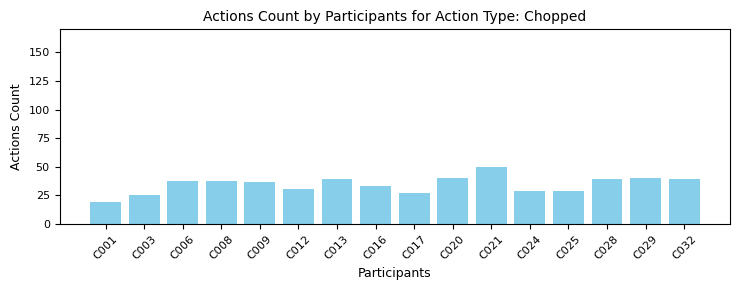

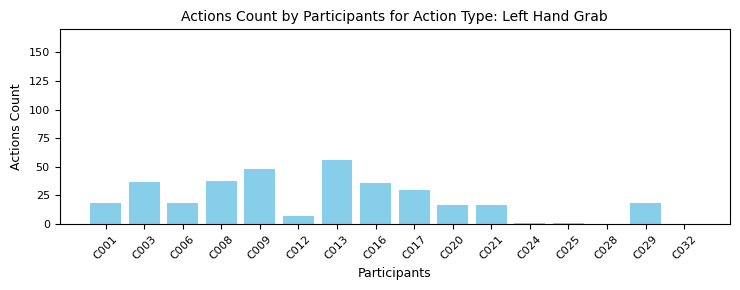

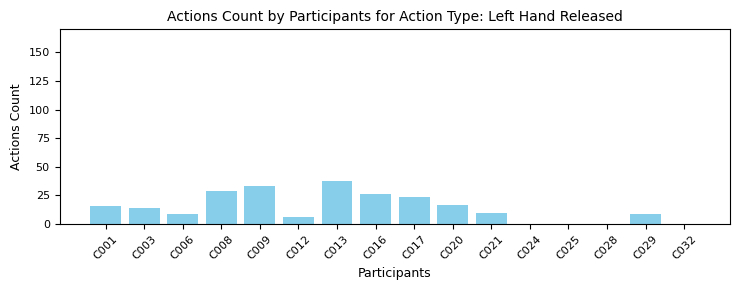

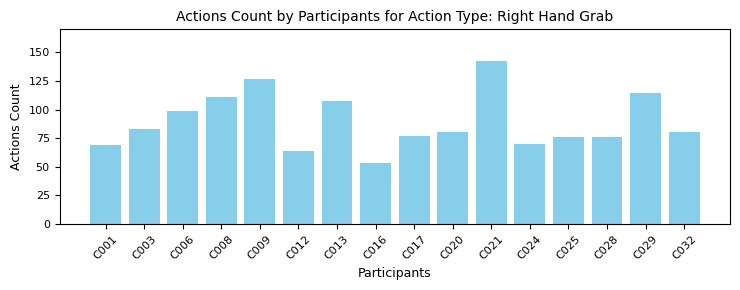

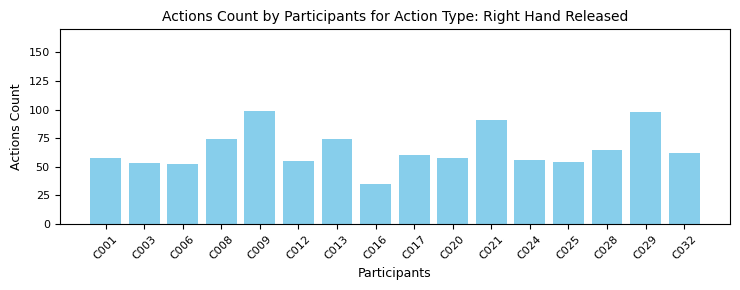

In [13]:
action_types = pivot_table_sum.index

# Create a bar chart for each action type
for action_type in action_types:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table_sum.columns, pivot_table_sum.loc[action_type], color='skyblue')
    plt.xlabel('Participants', fontsize=9)
    plt.ylabel('Actions Count', fontsize=9)
    plt.title(f'Actions Count by Participants for Action Type: {action_type}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim(0, 170)
    plt.tight_layout()
    plt.show()

#### Missed Interactions according to action type

In [27]:
pivot_table_missed= combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Total Missed Interactions',
    aggfunc='sum',
    fill_value=0
)
pivot_table_missed = pivot_table_missed.astype(int)
pivot_table_missed = pivot_table_missed.transpose()
pivot_table_missed

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C001,0,1,0,2,0
C003,0,8,0,5,0
C006,0,8,0,37,0
C008,0,3,0,6,0
C009,0,4,0,12,0
C012,0,1,0,0,0
C013,0,15,0,20,0
C016,0,8,0,8,0
C017,0,5,0,7,0


In [28]:
pivot_table_missed.to_csv('ActionTypeMissed_SimpleStew.csv')

#### Time spent on every step by participants

In [15]:
def extract_steps_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'steps_summary' in local_context:
                    return local_context['steps_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None


dataframes = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_steps_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id  
        dataframes.append(df)

comb_df = pd.concat(dataframes, ignore_index=True)
summary = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Time Spent', fill_value=0)
summary

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew
Participant,,,,,,,,,
C001,52.271889,34.762209,27.860945,14.297990,7.010834,20.721237,6.710511,57.777937,7.912109
C003,87.484374,36.384552,40.784180,21.399047,6.854889,20.017151,7.587189,104.225967,9.285584
C006,37.414059,73.885680,25.319519,17.137375,13.575149,20.132569,5.944031,21.941379,18.320770
C008,61.839364,57.612610,40.598389,15.379211,10.810608,22.791549,3.401886,39.262649,35.785950
C009,121.013931,63.153352,0.000000,27.016724,9.573608,29.738891,8.732483,121.301595,15.163849
C012,56.336768,30.183821,33.262574,25.584488,4.000305,21.929291,11.340332,19.974799,17.742645
C013,100.693760,70.596191,55.132463,23.648377,0.000000,27.470719,0.000000,46.458513,82.667084
C016,44.524573,22.732070,22.038771,15.997482,4.457733,19.105745,6.174271,14.194175,15.073944
C017,47.899383,35.231630,68.768601,18.104279,7.267639,28.767669,9.508789,73.851608,9.513427


In [16]:
summary['Time Spent S.D'] = summary.std(axis=1)
summary

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew,Time Spent S.D
Participant,,,,,,,,,,
C001,52.271889,34.762209,27.860945,14.297990,7.010834,20.721237,6.710511,57.777937,7.912109,19.373010
C003,87.484374,36.384552,40.784180,21.399047,6.854889,20.017151,7.587189,104.225967,9.285584,35.630609
C006,37.414059,73.885680,25.319519,17.137375,13.575149,20.132569,5.944031,21.941379,18.320770,19.902276
C008,61.839364,57.612610,40.598389,15.379211,10.810608,22.791549,3.401886,39.262649,35.785950,20.357014
C009,121.013931,63.153352,0.000000,27.016724,9.573608,29.738891,8.732483,121.301595,15.163849,47.383847
C012,56.336768,30.183821,33.262574,25.584488,4.000305,21.929291,11.340332,19.974799,17.742645,14.958293
C013,100.693760,70.596191,55.132463,23.648377,0.000000,27.470719,0.000000,46.458513,82.667084,35.520103
C016,44.524573,22.732070,22.038771,15.997482,4.457733,19.105745,6.174271,14.194175,15.073944,11.689684
C017,47.899383,35.231630,68.768601,18.104279,7.267639,28.767669,9.508789,73.851608,9.513427,25.446555


In [17]:
#summary.to_csv('TimeVariability_SimpleStew.csv')

In [18]:
summary_stepscount = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Count', fill_value=0)
summary_stepscount=summary_stepscount.astype(int)
summary_stepscount['Total Completed Steps']=summary_stepscount.sum(axis=1)
summary_stepscount

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew,Total Completed Steps
Participant,,,,,,,,,,
C001,4,8,4,4,1,4,1,1,1,28
C003,4,8,4,4,1,4,1,1,1,28
C006,4,8,4,4,1,4,1,1,1,28
C008,8,8,4,4,1,4,1,1,1,32
C009,8,8,0,4,1,4,1,1,1,28
C012,8,8,4,4,1,4,1,1,1,32
C013,8,8,4,4,0,4,0,1,1,30
C016,8,8,4,4,1,4,1,1,1,32
C017,4,8,4,4,1,4,1,1,1,28


In [19]:
#summary_stepscount.to_csv('TotalCompletedSteps_SimpleStew.csv')

In [20]:
from collections import defaultdict

def extract_object_interactions(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'object_interactions' in local_context:
                    return local_context['object_interactions']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

def summarize_interactions(interactions):
    summary = defaultdict(int)
    for obj, count in interactions.items():
        base_name = obj.split('_')[0].lower()  # Get the base name and convert to lowercase
        summary[base_name] += count
    return summary

all_interactions_summary = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]
    interactions = extract_object_interactions(file_path)
    if interactions is not None:
        summary = summarize_interactions(interactions)
        summary['Participant'] = participant_id  
        all_interactions_summary.append(summary)
    else:
        print(f"No object_interactions found in {file_path}")


# Combine all summaries into one dataframe
combined_summary = pd.DataFrame(all_interactions_summary)
combined_summary = combined_summary.set_index('Participant').transpose()
combined_summary.columns.name = None

#combined_summary['Mean']=combined_summary.mean(axis=1)
#combined_summary['Median']=combined_summary.median(axis=1)
#combined_summary['Std Dev']=combined_summary.std(axis=1)
#Q1 = combined_summary.quantile(0.25, axis=1)
#Q3 = combined_summary.quantile(0.75, axis=1)
#combined_summary['IQR'] = Q3 - Q1
combined_summary.loc['Total Interacted Objects'] = combined_summary.sum()

combined_summary = combined_summary.fillna(0).astype(int)
combined_summary

,C001,C003,C006,C008,C009,C012,C013,C016,C017,C020,C021,C024,C025,C028,C029,C032
knife,28,26,18,50,68,20,54,20,44,42,48,20,16,26,60,22
carrot,23,8,12,9,16,6,15,6,8,8,6,6,6,9,18,6
beefstewcookbook,10,39,10,27,23,9,12,11,10,19,39,9,9,8,8,9
brothparent,8,20,2,4,4,2,8,4,6,4,10,2,2,2,0,4
onion,22,24,18,39,25,25,26,17,22,20,31,16,16,29,19,22
meat,21,16,35,55,87,36,46,44,47,38,75,35,34,38,37,54
stirspoonsimple,4,2,2,4,8,2,10,4,2,4,4,2,2,4,2,2
tomato,16,14,15,24,39,14,18,16,15,17,15,14,14,14,68,14
carrottopquarter2,5,4,2,5,6,4,4,4,4,5,5,5,4,4,4,4
potato,14,14,18,13,18,20,18,15,14,20,19,15,16,14,19,14


In [21]:
#combined_summary.to_csv('Interacted_objects_SimpleStew.csv')

In [22]:
import pandas as pd
import glob
import os

# Function to extract the features summary from each notebook
def extract_interacted_df(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'interactions_df' in local_context:
                    interactions_df = local_context['interactions_df']
                    interactions_df.index.name = 'Completed Step'
                    interactions_df = interactions_df.reset_index()
                    return interactions_df
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# Extract data from each notebook
features_intobjects = []
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_interacted_df(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add participant ID to the DataFrame
        features_intobjects.append(df)
    else:
        print(f"No interactions_df found in {file_path}")

# Combine all participants' data into one DataFrame
combined_intobjects = pd.concat(features_intobjects, ignore_index=True)
combined_intobjects = combined_intobjects.set_index('Participant').reset_index()
combined_intobjects


,Participant,Completed Step,BeefStewCookbook,BrothParent,Carrot,CarrotBottomQuarter1,CarrotBottomQuarter2,CarrotBotton,CarrotTop,CarrotTopQuarter1,CarrotTopQuarter2,Knife,Meat,Onion,PepperShakerGrabableSimple,Potato,SaltShakerGrabableSimple,StirSpoonSimple,Tomato,Interacted Objects
0,C001,Pour Broth,1,3.0,4,0,0,0,0,0,0,0,0,2,0,0,0,2,0,12
1,C001,Add Beef,3,3.0,0,0,0,0,0,0,0,8,17,4,0,0,0,0,0,35
2,C001,Add Onion,1,2.0,2,0,0,0,0,0,0,10,2,16,0,0,0,0,0,33
3,C001,Add Tomtato,1,0.0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,16,25
4,C001,Add Carrot,1,0.0,5,4,4,4,4,4,5,6,2,0,0,0,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,C032,Add Potato,1,0.0,0,0,0,0,0,0,0,2,0,0,0,14,0,0,0,17
130,C032,Add Carrot,1,0.0,6,5,4,2,2,5,4,2,0,0,0,0,0,0,0,31
131,C032,Add pepper,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
132,C032,Add Salt,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2


In [29]:
combined_intobjects.to_csv('InteractedObjects_PerStep.csv', index=False)